Визуалиазция и анализ результатов коэффициаента заполнениями со строчными значениями.

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

test_string_load_results = pd.read_csv('results/test_string_load_results.csv')
test_double_string_load_results = pd.read_csv('results/test_double_string_load_results.csv')

Визуализация результатов для хэш-таблиц с одной хэш-функцией.

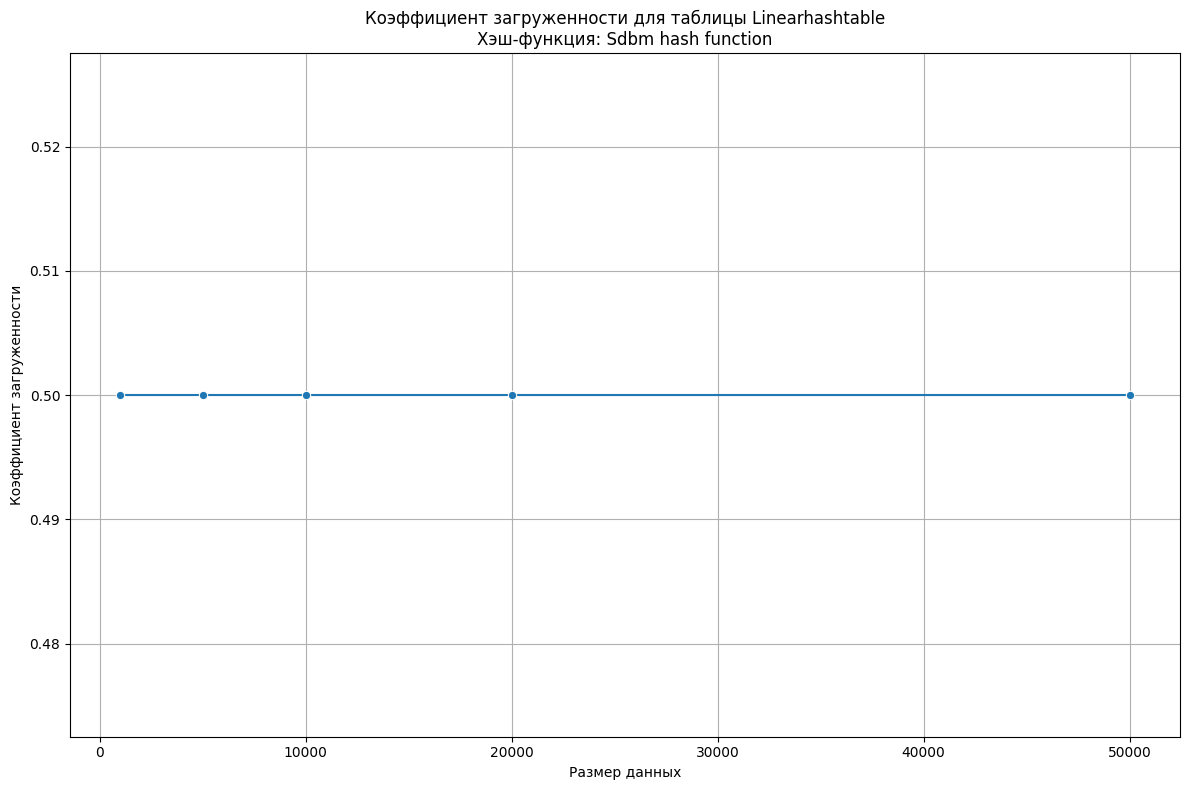

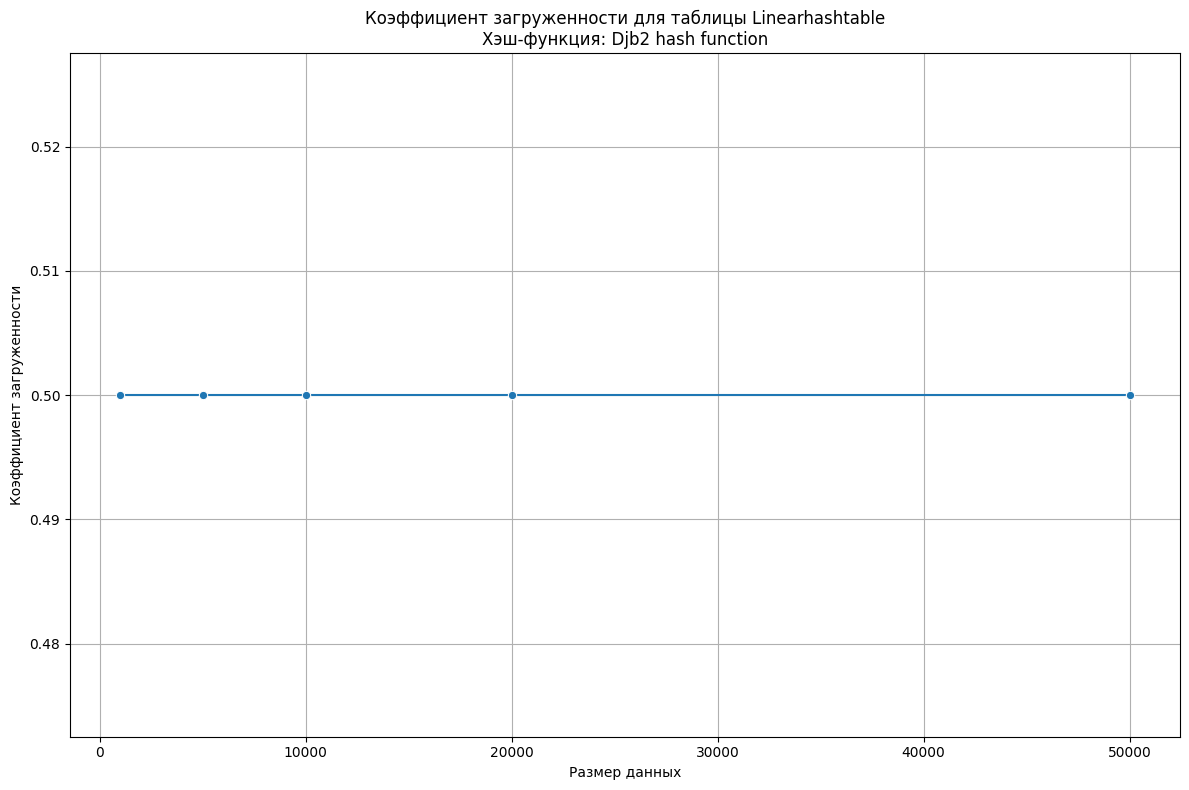

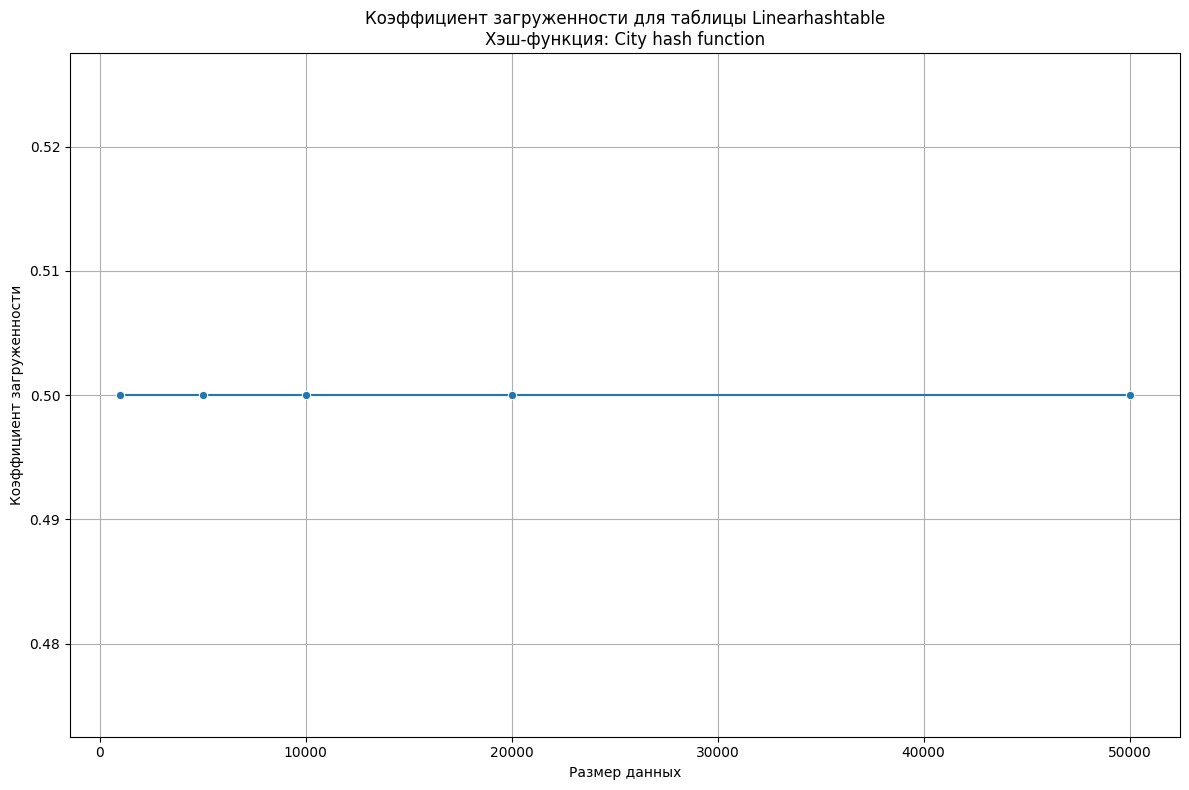

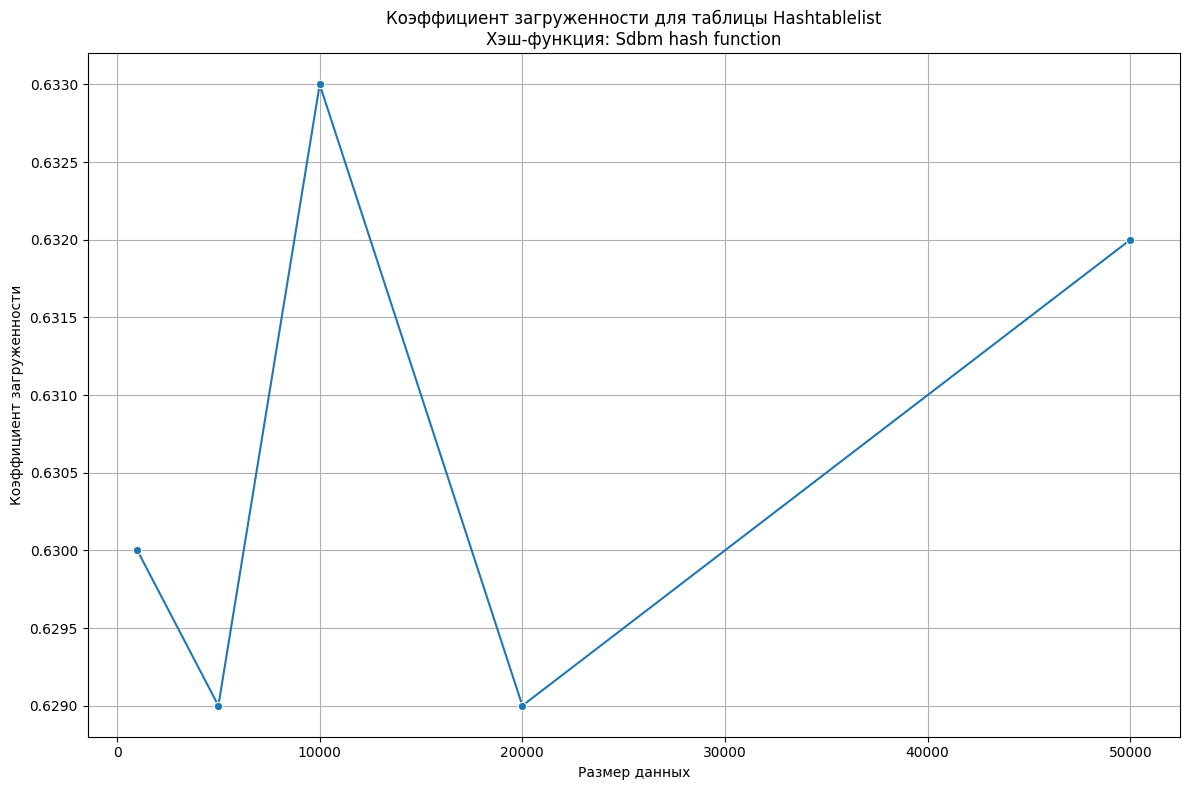

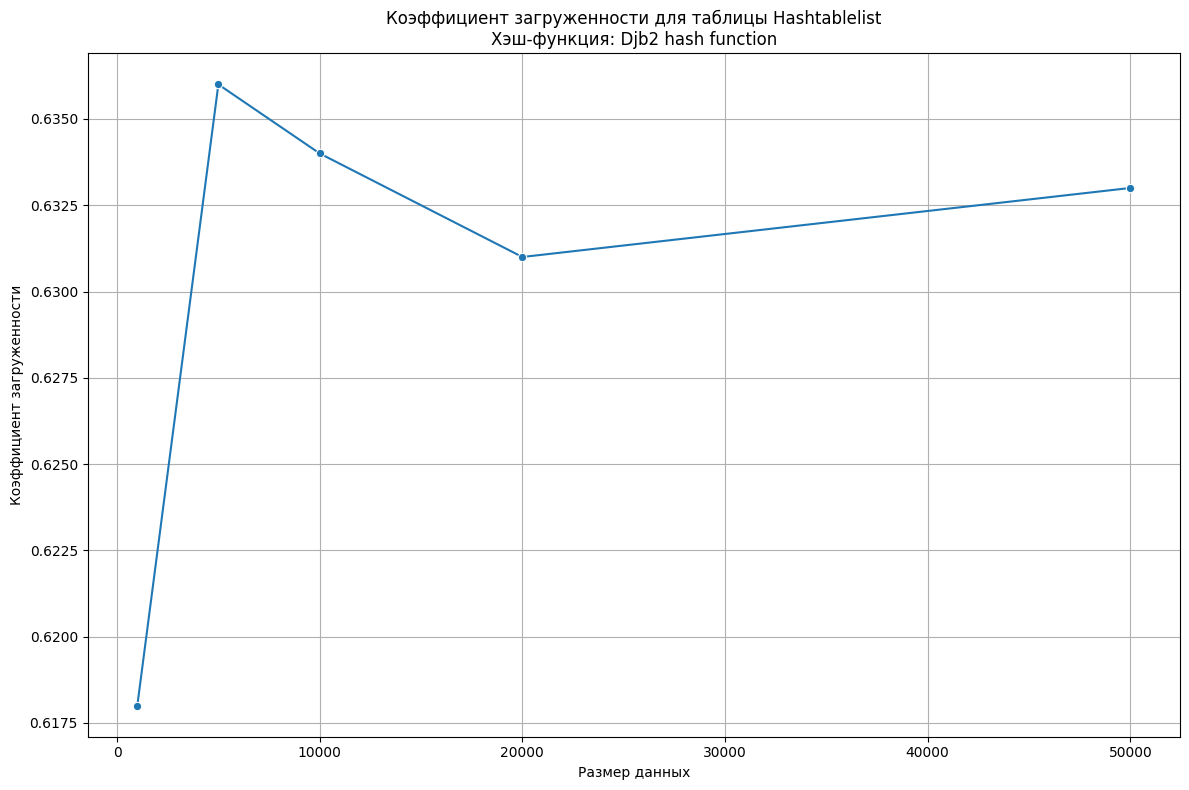

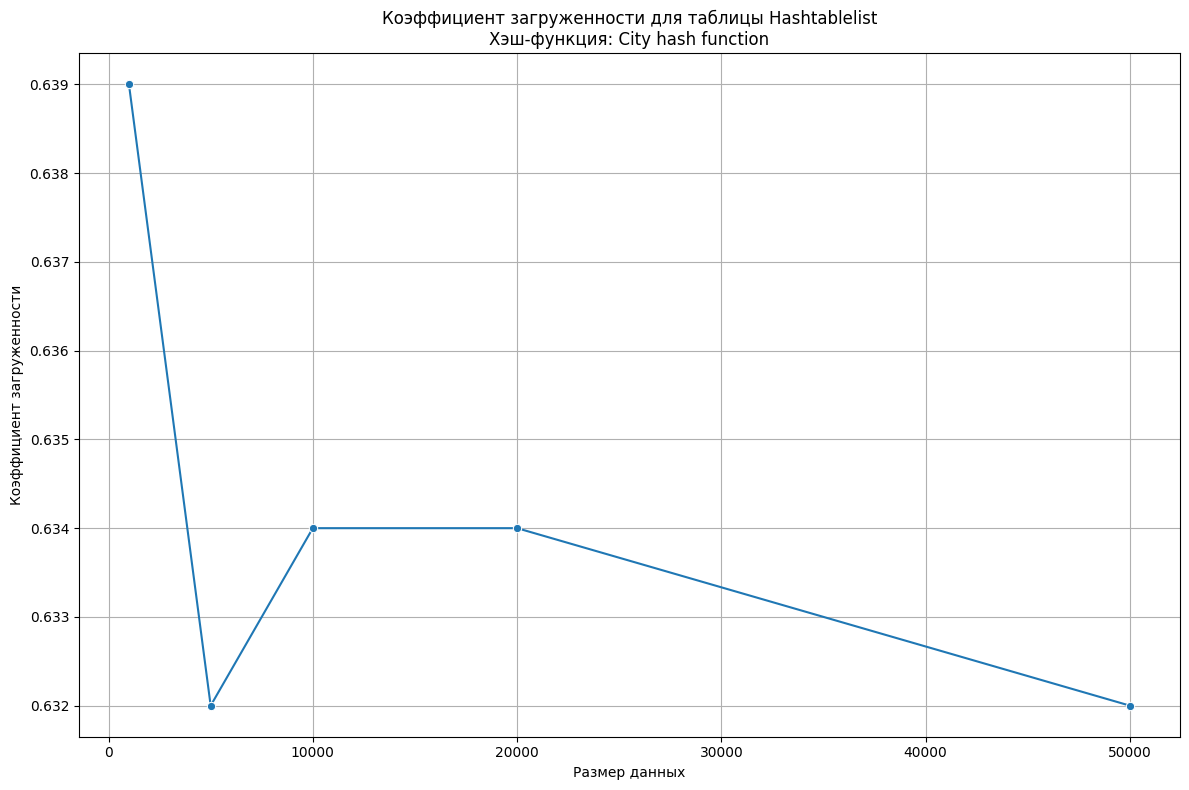

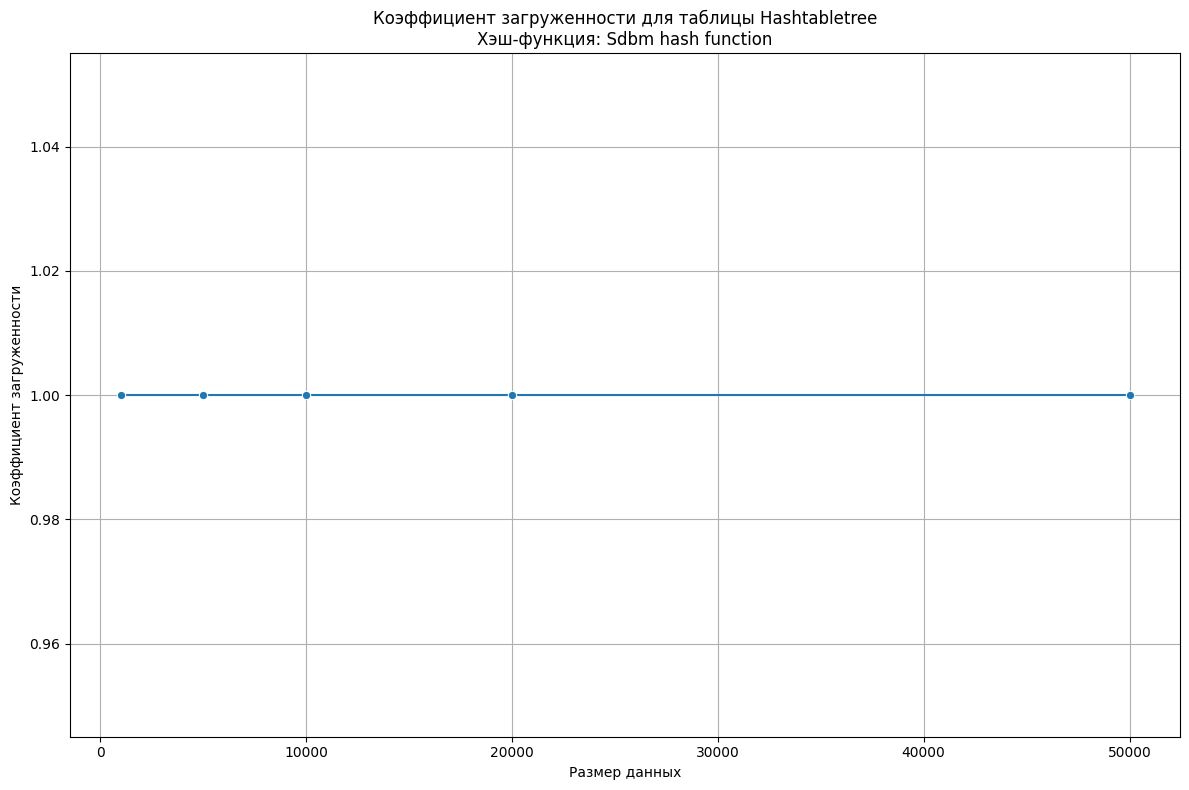

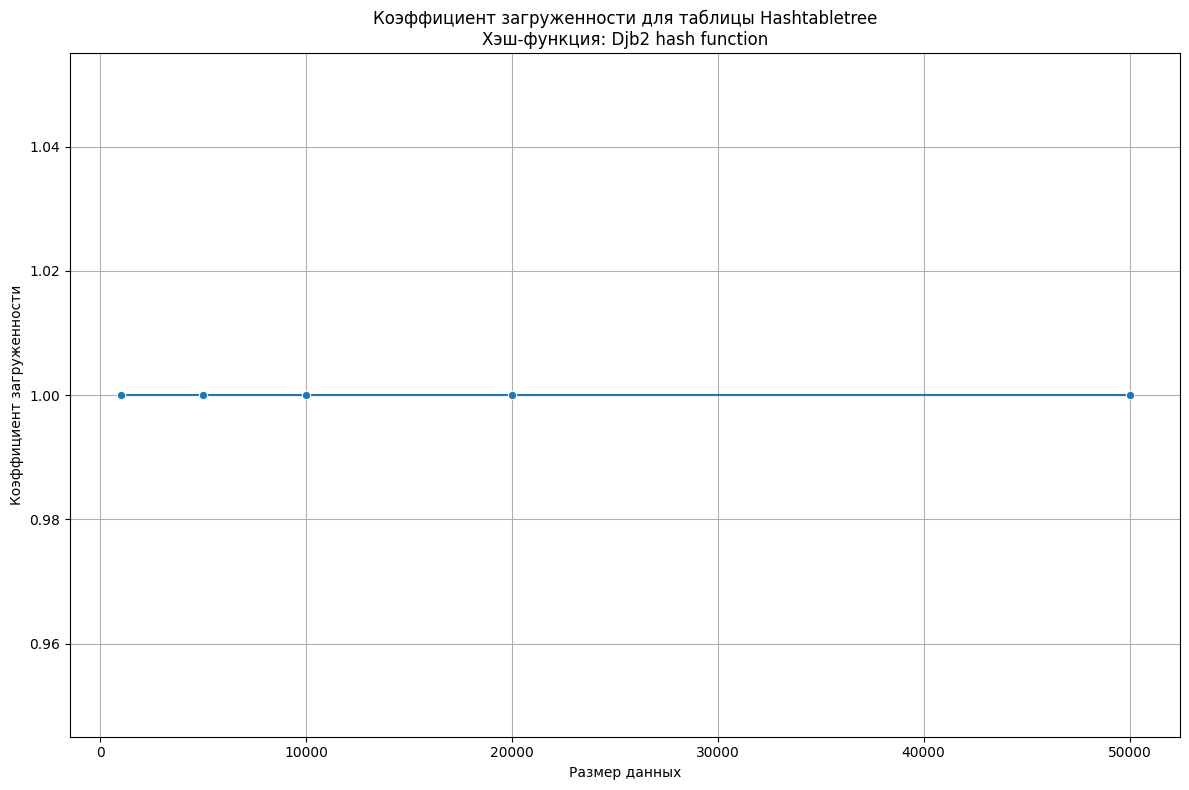

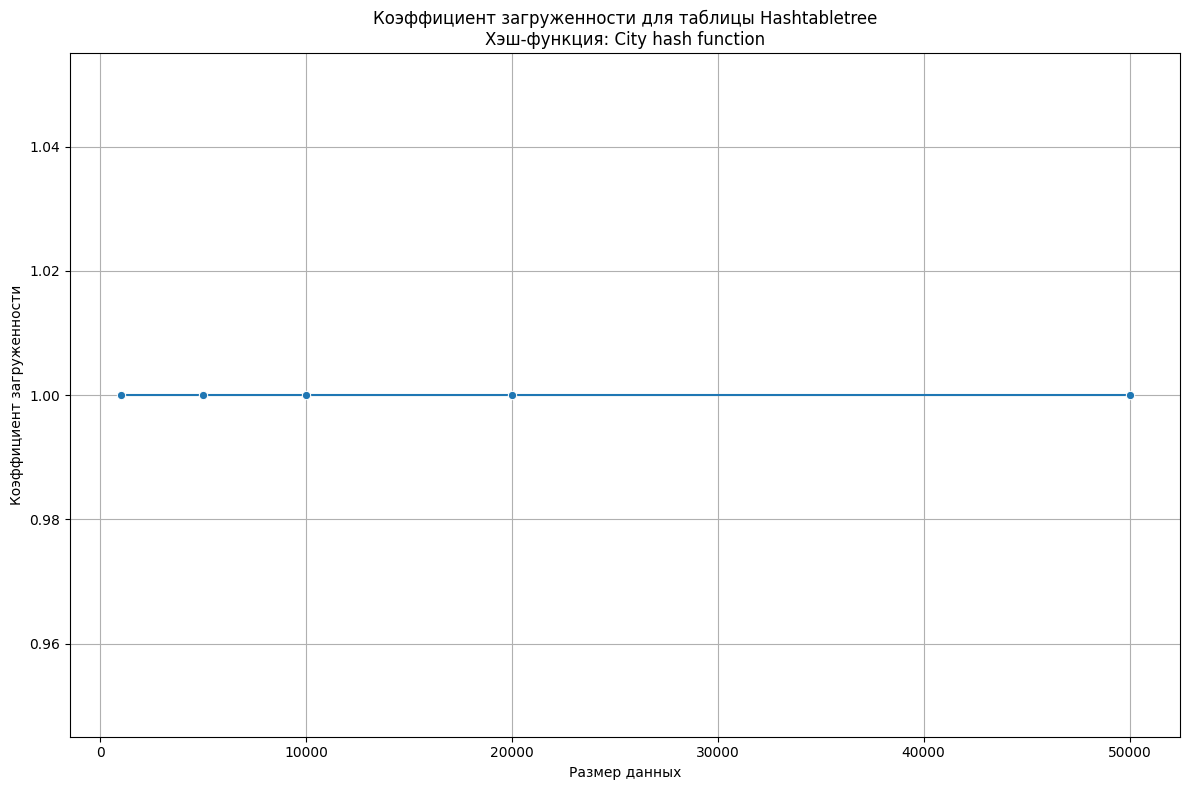

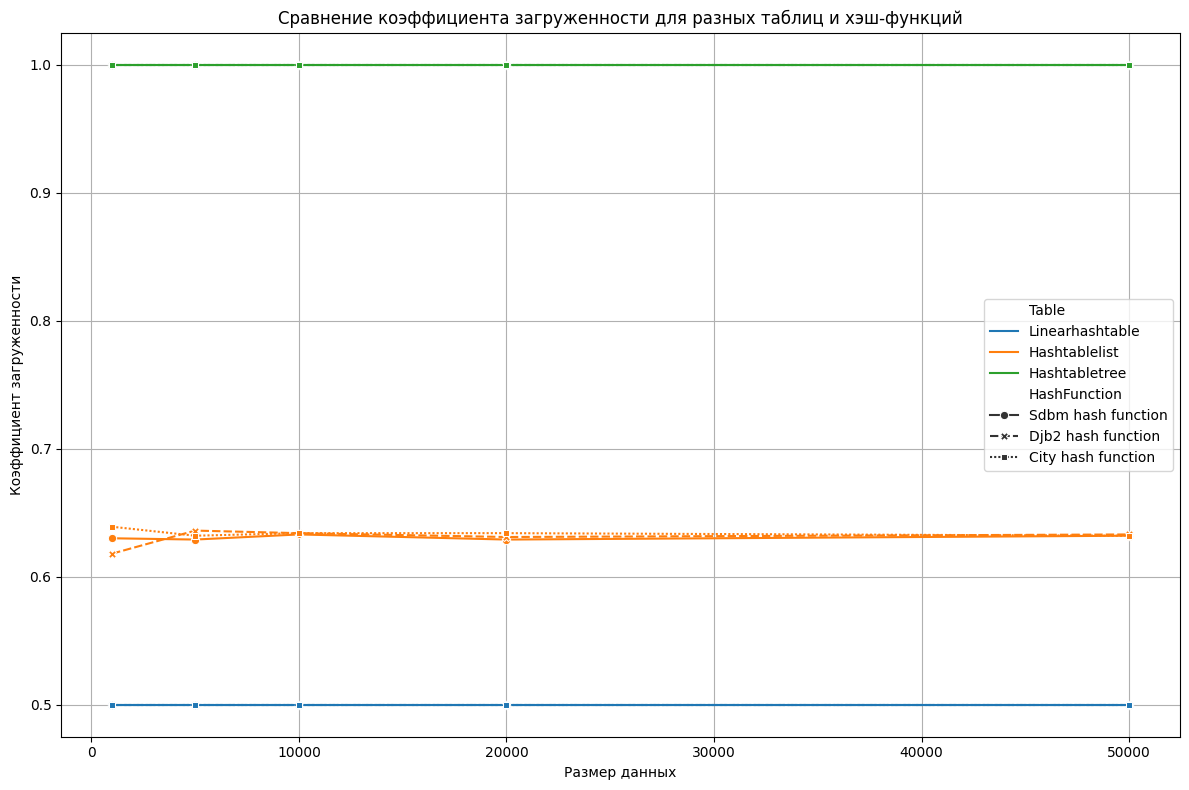

In [12]:
df_load = test_string_load_results

df_load = df_load.rename(columns={'Table': 'Table', 'HashFunction': 'HashFunction', 'DataSize': 'DataSize', 'LoadFactor': 'LoadFactor'})
df_load['Table'] = df_load['Table'].str.capitalize() 
df_load['HashFunction'] = df_load['HashFunction'].str.capitalize()  

def plot_load_factor_by_table_and_hash_function(df):
    tables = df['Table'].unique()
    for table in tables:
        hash_functions = df[df['Table'] == table]['HashFunction'].unique()
        for hash_function in hash_functions:
            plt.figure(figsize=(12, 8))
            sns.lineplot(
                data=df[(df['Table'] == table) & (df['HashFunction'] == hash_function)],
                x='DataSize', y='LoadFactor', marker='o'
            )
            plt.title(f'Коэффициент загруженности для таблицы {table}\nХэш-функция: {hash_function}')
            plt.xlabel('Размер данных')
            plt.ylabel('Коэффициент загруженности')
            plt.grid(True)
            plt.tight_layout()
            plt.show()

def plot_overall_comparison(df):
    plt.figure(figsize=(12, 8))
    sns.lineplot(
        data=df,
        x='DataSize', y='LoadFactor', hue='Table', style='HashFunction', markers=True
    )
    plt.title('Сравнение коэффициента загруженности для разных таблиц и хэш-функций')
    plt.xlabel('Размер данных')
    plt.ylabel('Коэффициент загруженности')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_load_factor_by_table_and_hash_function(df_load)
plot_overall_comparison(df_load)



Вывод по результатам.

In [13]:
df = test_string_load_results

df['Table'] = df['Table'].str.capitalize()
df['HashFunction'] = df['HashFunction'].str.capitalize()

average_load_factor_table = df.groupby('Table')['LoadFactor'].mean().sort_values()
print("Средний коэффициент загруженности для каждой таблицы:")
print(average_load_factor_table)
print()

best_table = average_load_factor_table.idxmin()
print(f"Таблица с наименьшим средним коэффициентом загруженности: {best_table} с коэффициентом {average_load_factor_table.min():.3f}.")
print()

hash_functions = df['HashFunction'].unique()
for hash_function in hash_functions:
    fastest_table = df[df['HashFunction'] == hash_function].sort_values('LoadFactor').iloc[0]
    print(f"Таблица с наименьшим коэффициентом загруженности для хэш-функции {hash_function}:")
    print(f"  Таблица: {fastest_table['Table']}, Размер данных: {fastest_table['DataSize']}, "
          f"Коэффициент загруженности: {fastest_table['LoadFactor']:.3f}")
    print()

grouped_by_size = df.groupby('DataSize')
for size, group in grouped_by_size:
    best_row = group.sort_values('LoadFactor').iloc[0]
    print(f"  Размер данных {size}: Таблица: {best_row['Table']}, "
          f"Хэш-функция: {best_row['HashFunction']}, "
          f"Коэффициент загруженности: {best_row['LoadFactor']:.3f}.")
    print()


Средний коэффициент загруженности для каждой таблицы:
Table
Linearhashtable    0.500000
Hashtablelist      0.631733
Hashtabletree      1.000000
Name: LoadFactor, dtype: float64

Таблица с наименьшим средним коэффициентом загруженности: Linearhashtable с коэффициентом 0.500.

Таблица с наименьшим коэффициентом загруженности для хэш-функции Sdbm hash function:
  Таблица: Linearhashtable, Размер данных: 1000, Коэффициент загруженности: 0.500

Таблица с наименьшим коэффициентом загруженности для хэш-функции Djb2 hash function:
  Таблица: Linearhashtable, Размер данных: 1000, Коэффициент загруженности: 0.500

Таблица с наименьшим коэффициентом загруженности для хэш-функции City hash function:
  Таблица: Linearhashtable, Размер данных: 1000, Коэффициент загруженности: 0.500

  Размер данных 1000: Таблица: Linearhashtable, Хэш-функция: Sdbm hash function, Коэффициент загруженности: 0.500.

  Размер данных 5000: Таблица: Linearhashtable, Хэш-функция: Sdbm hash function, Коэффициент загруженнос

Визуализация результатов для хэш-таблиц с двумя хэш-функциями.

C:\Users\buddy\AppData\Local\Temp\ipykernel_7616\2903128708.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(


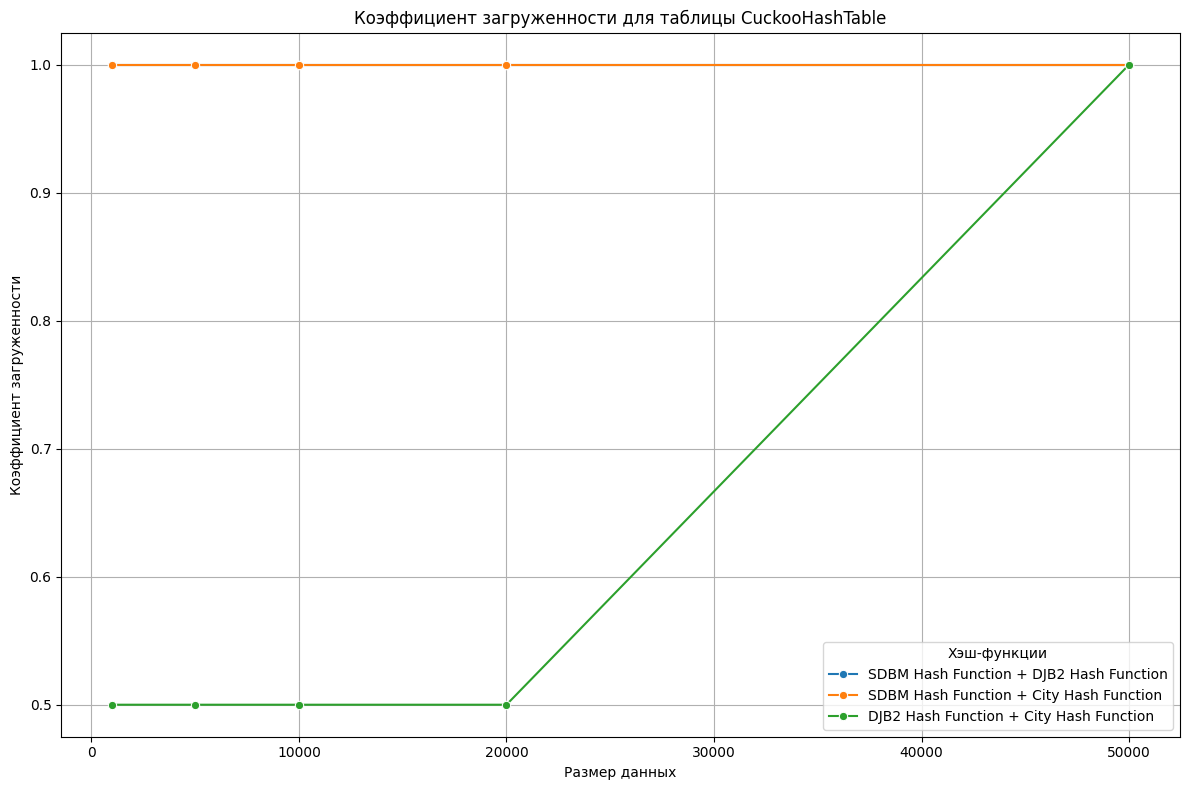

C:\Users\buddy\AppData\Local\Temp\ipykernel_7616\2903128708.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(


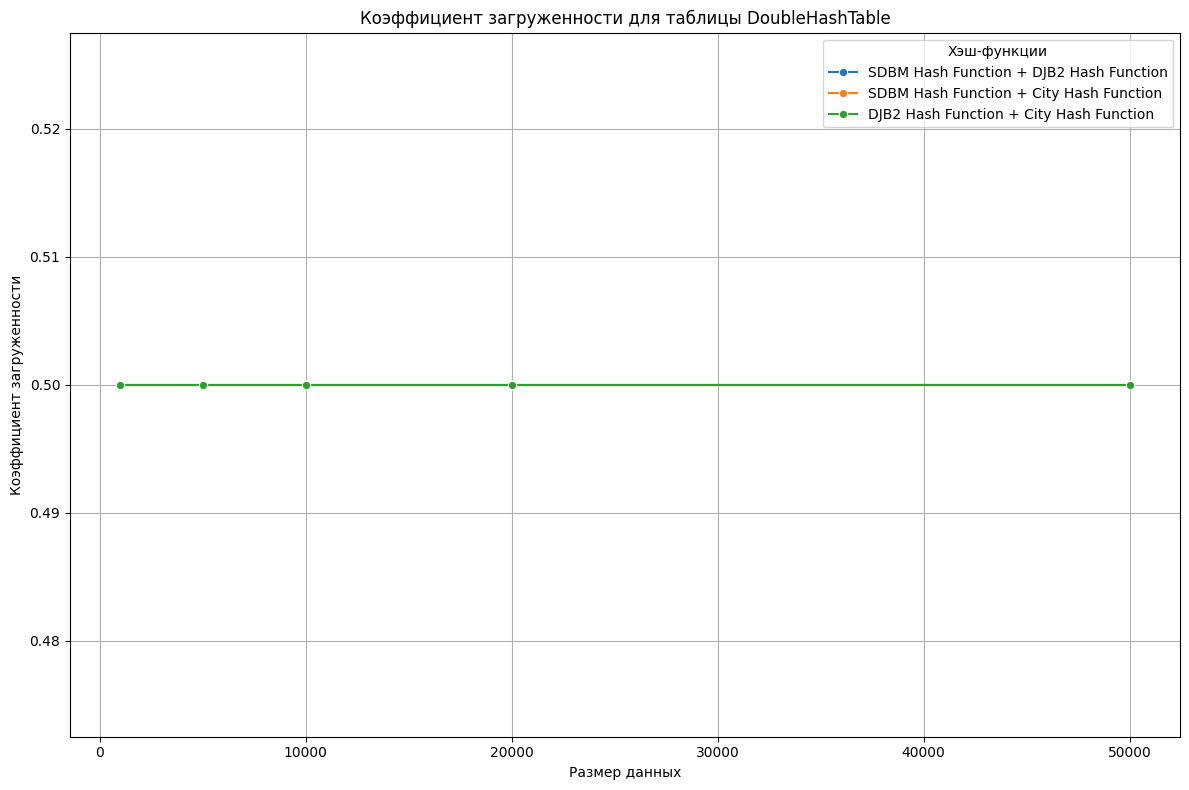

C:\Users\buddy\AppData\Local\Temp\ipykernel_7616\2903128708.py:25: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(


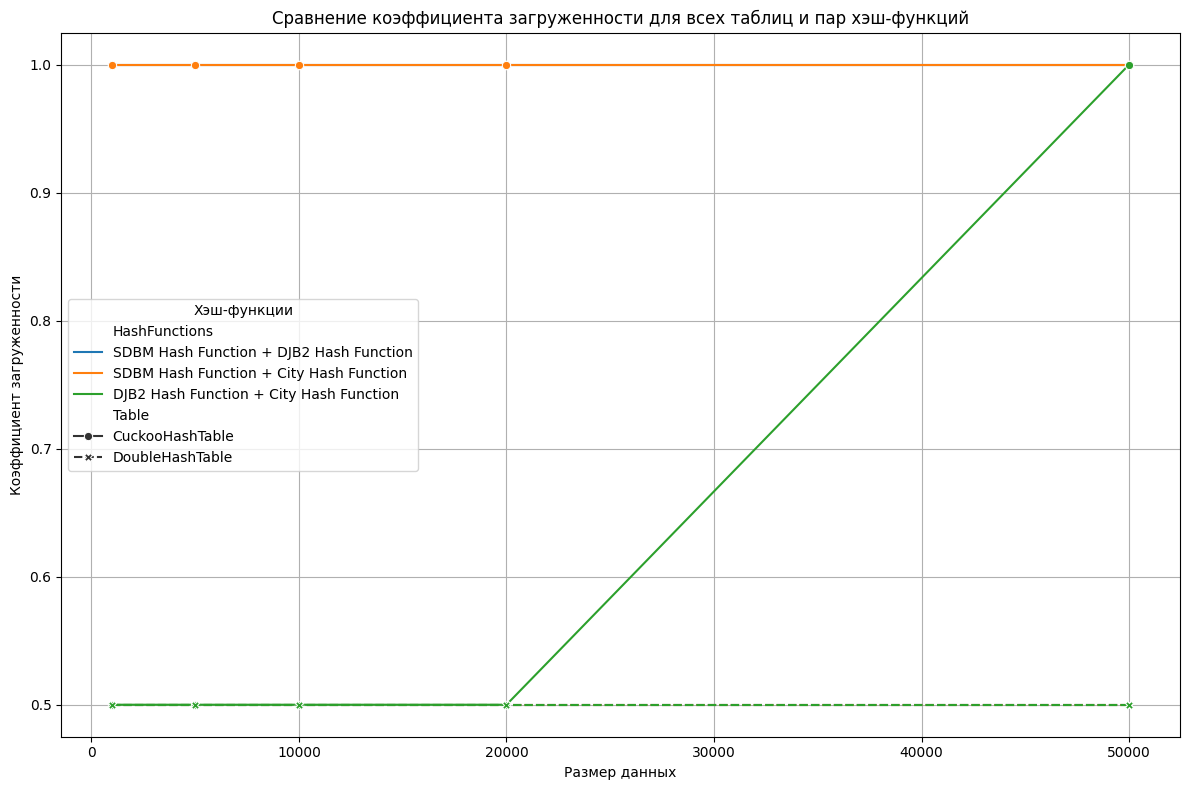

In [14]:
df_load = test_double_string_load_results

df_load['HashFunctions'] = df_load['HashFunction1'] + " + " + df_load['HashFunction2']

def plot_load_factor_by_table_and_hash_functions(df):
    tables = df['Table'].unique()
    for table in tables:
        plt.figure(figsize=(12, 8))
        
        sns.lineplot(
            data=df[df['Table'] == table],
            x='DataSize', y='LoadFactor', hue='HashFunctions', marker='o', ci=None
        )
        plt.title(f'Коэффициент загруженности для таблицы {table}')
        plt.xlabel('Размер данных')
        plt.ylabel('Коэффициент загруженности')
        plt.grid(True)
        plt.tight_layout()
        plt.legend(title="Хэш-функции")
        plt.show()

def plot_overall_comparison_without_confidence(df):
    plt.figure(figsize=(12, 8))
    
    sns.lineplot(
        data=df,
        x='DataSize', y='LoadFactor', hue='HashFunctions', style='Table', markers=True, ci=None
    )
    plt.title('Сравнение коэффициента загруженности для всех таблиц и пар хэш-функций')
    plt.xlabel('Размер данных')
    plt.ylabel('Коэффициент загруженности')
    plt.grid(True)
    plt.tight_layout()
    plt.legend(title="Хэш-функции")
    plt.show()

plot_load_factor_by_table_and_hash_functions(df_load)
plot_overall_comparison_without_confidence(df_load)

Вывод по результатам.

In [15]:
df = test_double_string_load_results

df['Table'] = df['Table'].str.capitalize()
df['HashFunction1'] = df['HashFunction1'].str.capitalize()
df['HashFunction2'] = df['HashFunction2'].str.capitalize()

average_load_factor_table = df.groupby('Table')['LoadFactor'].mean().sort_values()
print("Средний коэффициент загруженности для каждой таблицы:")
print(average_load_factor_table)
print()

best_table = average_load_factor_table.idxmin()
print(f"Таблица с наименьшим средним коэффициентом загруженности: {best_table} с коэффициентом {average_load_factor_table.min():.3f}.")
print()

hash_function_combinations = df.groupby(['HashFunction1', 'HashFunction2'])
for (hash_function1, hash_function2), group in hash_function_combinations:
    best_row = group.sort_values('LoadFactor').iloc[0]
    print(f"Таблица с наименьшим коэффициентом загруженности для хэш-функций ({hash_function1}, {hash_function2}):")
    print(f"  Таблица: {best_row['Table']}, Размер данных: {best_row['DataSize']}, "
          f"Коэффициент загруженности: {best_row['LoadFactor']:.3f}.")
    print()

grouped_by_size = df.groupby('DataSize')
for size, group in grouped_by_size:
    best_row = group.sort_values('LoadFactor').iloc[0]
    print(f"  Размер данных {size}: Таблица: {best_row['Table']}, "
          f"Хэш-функции: ({best_row['HashFunction1']}, {best_row['HashFunction2']}), "
          f"Коэффициент загруженности: {best_row['LoadFactor']:.3f}.")
    print()


Средний коэффициент загруженности для каждой таблицы:
Table
Doublehashtable    0.500000
Cuckoohashtable    0.866667
Name: LoadFactor, dtype: float64

Таблица с наименьшим средним коэффициентом загруженности: Doublehashtable с коэффициентом 0.500.

Таблица с наименьшим коэффициентом загруженности для хэш-функций (Djb2 hash function, City hash function):
  Таблица: Cuckoohashtable, Размер данных: 1000, Коэффициент загруженности: 0.500.

Таблица с наименьшим коэффициентом загруженности для хэш-функций (Sdbm hash function, City hash function):
  Таблица: Doublehashtable, Размер данных: 1000, Коэффициент загруженности: 0.500.

Таблица с наименьшим коэффициентом загруженности для хэш-функций (Sdbm hash function, Djb2 hash function):
  Таблица: Doublehashtable, Размер данных: 1000, Коэффициент загруженности: 0.500.

  Размер данных 1000: Таблица: Doublehashtable, Хэш-функции: (Sdbm hash function, Djb2 hash function), Коэффициент загруженности: 0.500.

  Размер данных 5000: Таблица: Doublehash